In [1]:
import os
from os import sys
sys.path.append('./newdata')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from species import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [2]:
krome_idx_GRAIN0

9

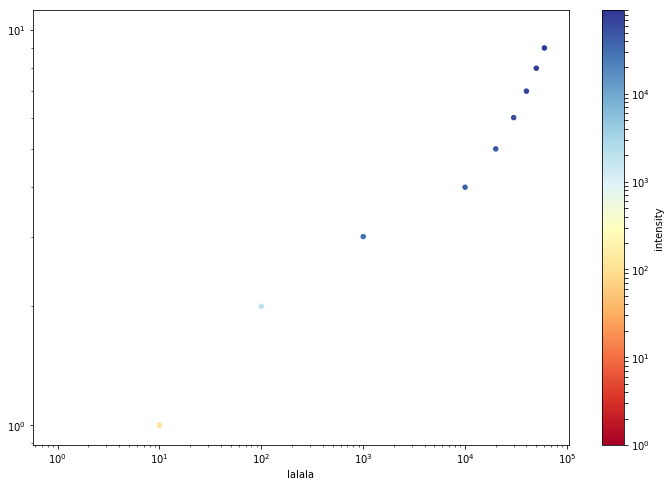

In [43]:
# test
plt.figure(figsize=(12,8))
cm = plt.cm.get_cmap('RdYlBu') # choose a colorstyle
x = [1,10,100,1000,10000,20000,30000,40000,50000,60000]
y = range(10)
z = [1, 100, 2000, 30000, 40000, 50000, 60000, 70000, 80000, 90000] # intensity, will be desribed in color
sc = plt.scatter(x, y, c=z ,norm=matplotlib.colors.LogNorm(), s=20, cmap=cm) 
        # optional vmin & vmax set range of colorbar; LogNorm() make colorbar logarithmic; 's' denote pointscale
plt.xscale('log')
plt.yscale('log') # make axis logarithmic
plt.xlabel('lalala')
cb = plt.colorbar(sc)
cb.set_label('intensity')
plt.show()

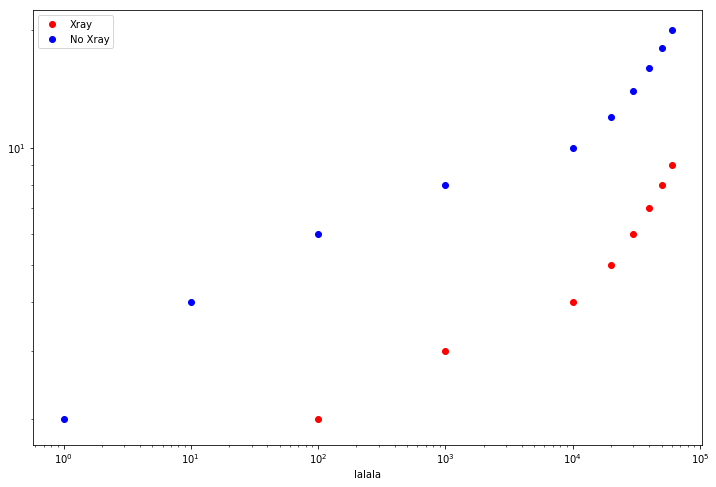

In [44]:
# test
plt.figure(figsize=(12,8))
x1 = [1,10,100,1000,10000,20000,30000,40000,50000,60000]
y1 = range(10)
x2 = [1,10,100,1000,10000,20000,30000,40000,50000,60000]
y2 = [2,4,6,8,10,12,14,16,18,20]
plt.scatter(x1, y1, c='red', label='Xray')
plt.scatter(x2, y2, c='blue', label='No Xray')
plt.xscale('log')
plt.yscale('log') # make axis logarithmic
plt.xlabel('lalala')
plt.legend()
plt.show()

In [3]:
Col = [
    '#b2182b', '#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de',
    '#4393c3', '#2166ac'
]

# plot for disk simulation
def plot_disk(spe, radius_list, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    result_radius_y = []
    result_abundance_y = [] # maintain necessary plot information for X-ray situation
    result_radius_n = []
    result_abundance_n = [] # maintain necessary plot information for non X-ray situation
    
    dd = r'$n_{\mathrm{H}}$'
    for radius in radius_list:
        txt_y = './newdata/{}AU_y'.format(str(radius))
        raw_y = np.loadtxt(txt_y)
        txt_n = './newdata/{}AU_n'.format(str(radius))
        raw_n = np.loadtxt(txt_n)
        abu_y = raw_y[:, eval('krome_idx_' + spe)][-1]
        abu_n = raw_n[:, eval('krome_idx_' + spe)][-1]
        result_radius_y.append(np.abs(radius))
        result_abundance_y.append(abu_y)
        result_radius_n.append(np.abs(radius))
        result_abundance_n.append(abu_n)
    
    
    ax.loglog(result_radius_y, result_abundance_y, color='green', label='X-ray', linestyle='-')
    ax.loglog(result_radius_n, result_abundance_n, color='black', label='No X-ray', linestyle='-')
    ax.set_xlabel('radius(AU)', fontsize=25)
    ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + dd, fontsize=25)
    plt.legend()
    #plt.tight_layout()
    plt.tight_layout()
    
    
    
    # for 3D model, we can use color to denote abundance
    '''
    cm = plt.cm.get_cmap('RdYlBu')
    xray = plt.scatter(result_radius_y, result_height_y, c=result_abundance_y, norm=matplotlib.colors.LogNorm(), s=30, cmap=cm)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('r')
    plt.ylabel('h')
    cb_y = plt.colorbar(xray)
    cb_y.set_label('abundance')
    plt.show()
    
    noxray = plt.scatter(result_radius_n, result_height_n, c=result_abundance_n, norm=matplotlib.colors.LogNorm(), s=30, cmap=cm)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('r')
    plt.ylabel('h')
    cb_n = plt.colorbar(noxray)
    cb_n.set_label('abundance')
    plt.show()
    '''

    
def plot_disktest(spe, radius_list, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    result_radius_y = []
    result_abundance_y = [] # maintain necessary plot information for X-ray situation
    result_radius_n = []
    result_abundance_n = [] # maintain necessary plot information for non X-ray situation
    
    dd = r'$n_{\mathrm{H}}$'
    for radius in radius_list:
        txt_y = './testdata/{}AU_y'.format(str(radius))
        raw_y = np.loadtxt(txt_y)
        txt_n = './testdata/{}AU_n'.format(str(radius))
        raw_n = np.loadtxt(txt_n)
        abu_y = raw_y[:, eval('krome_idx_' + spe)][-1]
        abu_n = raw_n[:, eval('krome_idx_' + spe)][-1]
        result_radius_y.append(np.abs(radius))
        result_abundance_y.append(abu_y)
        result_radius_n.append(np.abs(radius))
        result_abundance_n.append(abu_n)
    
    
    ax.loglog(result_radius_y, result_abundance_y, color='green', label='X-ray', linestyle='-')
    ax.loglog(result_radius_n, result_abundance_n, color='black', label='No X-ray', linestyle='-')
    ax.set_xlabel('radius(AU)', fontsize=25)
    ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + dd, fontsize=25)
    plt.legend()
    #plt.tight_layout()
    plt.tight_layout()    


def plot_default(spe, radius, d=4, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    txt = './newdata/{}AU_y'.format(str(radius))
    raw = np.loadtxt(txt)
    #txt_stop = './data/0dis0' + str(d)
    #raw_stop = np.loadtxt(txt_stop)
    txt_0 = './newdata/{}AU_n'.format(str(radius))
    raw_0 = np.loadtxt(txt_0)
    t = raw[:, 0]
    dd = r'$n_{\mathrm{H}}$'
    
    abu = raw[:, eval('krome_idx_' + spe)]
    print(eval('krome_idx_' + spe))
    #abu = raw[:, spe] #test for plot tool
    
    #abu_stop = raw_stop[:, eval('krome_idx_' + spe)]
    
    abu_0 = raw_0[:, eval('krome_idx_' + spe)]
    #abu_0 = raw_0[:, spe] #test for plot tool
    
    ax.loglog(t, abu, color='green', label='X-ray', linestyle='-')
    #ax.loglog(t, abu_stop, color='green', label='X-ray removed', linestyle='--')
    ax.loglog(t, abu_0, color='black', label='No X-ray', linestyle='-.')
    ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    #ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + dd, fontsize=25)
    #ax.set_xlim([1e2, 1e6])
    plt.legend()
    plt.tight_layout()
    

def plot_test(spe, radius, d=4, ax=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    txt = './testdata/{}AU_y'.format(str(radius))
    raw = np.loadtxt(txt)
    #txt_stop = './data/0dis0' + str(d)
    #raw_stop = np.loadtxt(txt_stop)
    txt_0 = './testdata/{}AU_n'.format(str(radius))
    raw_0 = np.loadtxt(txt_0)
    t = raw[:, 0]
    dd = r'$n_{\mathrm{H}}$'
    
    abu = raw[:, eval('krome_idx_' + spe)]
    print(eval('krome_idx_' + spe))
    #abu = raw[:, spe] #test for plot tool
    
    #abu_stop = raw_stop[:, eval('krome_idx_' + spe)]
    
    abu_0 = raw_0[:, eval('krome_idx_' + spe)]
    #abu_0 = raw_0[:, spe] #test for plot tool
    
    ax.loglog(t, abu, color='green', label='X-ray', linestyle='-')
    #ax.loglog(t, abu_stop, color='green', label='X-ray removed', linestyle='--')
    ax.loglog(t, abu_0, color='black', label='No X-ray', linestyle='-.')
    ax.set_xlabel(r'$t$ (yr)', fontsize=25)
    #ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + dd, fontsize=25)
    #ax.set_xlim([1e2, 1e6])
    plt.legend()
    plt.tight_layout()

    
def plot_all(spe, div=None, d=[], stop=True, ax=None):
    if d == []:
        d = np.arange(8) + 1
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    for i in d:
        txt = './data/2dis' + str(i)
        raw = np.loadtxt(txt)
        txt_l = './data/1dis' + str(i)
        raw_l = np.loadtxt(txt_l)
        txt_u = './data/3dis' + str(i)
        raw_u = np.loadtxt(txt_u)
        t = raw[:, 0]
        dd = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        abu_l = raw_l[:, eval('krome_idx_' + spe)]
        abu_u = raw_u[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            abu_l /= raw_l[:, eval('krome_idx_' + div)]
            abu_u /= raw_u[:, eval('krome_idx_' + div)]
            dd = r'$n{}$'.format(latex_name(div))
        ax.loglog(t, abu, label=txt[-1] + ' kpc', color=Col[i - 1])
        #ax.loglog(t, abu_l, color=Col[i - 1], linestyle=':')
        #ax.loglog(t, abu_u, color=Col[i - 1], linestyle='-.')
        #ax.fill_between(t, abu_l, abu_u, color=Col[i - 1], alpha=0.3)
        ax.set_xlabel(r'$t$ (yr)', fontsize=25)
        ax.set_ylabel(r'$n{}$'.format(latex_name(spe)) + '/' + dd, fontsize=25)
        if stop:
            txt = './data/2dis0' + str(i)
            raw0 = np.loadtxt(txt)
            txt_l0 = './data/1dis0' + str(i)
            raw_l0 = np.loadtxt(txt_l0)
            txt_u0 = './data/3dis0' + str(i)
            raw_u0 = np.loadtxt(txt_u0)
            t = raw0[:, 0] - 1e6
            abu = raw0[:, eval('krome_idx_' + spe)]
            abu_l = raw_l0[:, eval('krome_idx_' + spe)]
            abu_u = raw_u0[:, eval('krome_idx_' + spe)]
            if div != None:
                abu /= raw0[:, eval('krome_idx_' + div)]
                abu_l /= raw_l0[:, eval('krome_idx_' + div)]
                abu_u /= raw_u0[:, eval('krome_idx_' + div)]
            #ax.loglog(t, abu, color=Col[i - 1], linestyle='--')
            #ax.loglog(t, abu_l, color=Col[i - 1], linestyle=':')
            #ax.loglog(t, abu_u, color=Col[i - 1], linestyle='-.')
            #ax.fill_between(t, abu_l, abu_u, color=Col[i - 1], alpha=0.3)
    for i, dis in enumerate(d, 1):
        #raw = np.loadtxt('./data/{}dis_inf'.format(str(i)))
        raw = np.loadtxt('./data/3dis_inf')
        t = raw[:, 0]
        d = r'$n_{\mathrm{H}}$'
        abu = raw[:, eval('krome_idx_' + spe)]
        if div != None:
            abu /= raw[:, eval('krome_idx_' + div)]
            d = 'n' + div
        ax.loglog(t,
                  abu,
                  label='3infinity',
                  color=Col[2],
                  linestyle='-.',
                  linewidth=5)
    ax.set_xlim([0, 1e8])
    #plt.legend()


def plot_group(*args):
    l = len(args)
    if l == 1:
        f, ax = plt.subplot(figsize=(24, 8))
        plot_all(args[0], ax=ax)
        return
    line = int(np.ceil(l / 2))
    f, ax = plt.subplots(line, 2, figsize=(24, 8 * line))
    ax = ax.flatten()
    if l % 2:
        f.delaxes(ax[-1])
    print(l)
    for i, spe in enumerate(args):
        plot_all(spe, ax=ax[i], d=np.array([1, 3, 8]))
    plt.legend()
    plt.tight_layout()

In [4]:
def latex_name(S):
    if 'DUST' in S:
        S = S.replace('_DUST','')
    Name = {}
    for i in ['H', 'N', 'O', 'C', 'S', 'F', 'M', 'P', 'F']:
        Name[i] = '\mathrm{' + i + '}'
    for i in ['E', 'I', 'L', 'A', 'G']:
        Name[i] = '\mathrm{' + i.lower() + '}'
    for i in '0123456789':
        Name[i] = '_{}'.format(i)
    Name['j'] = '^+'
    Name['k'] = '^-'
    S_n = ''
    for i in S:
        S_n += Name[i]
    return '({})'.format(S_n)

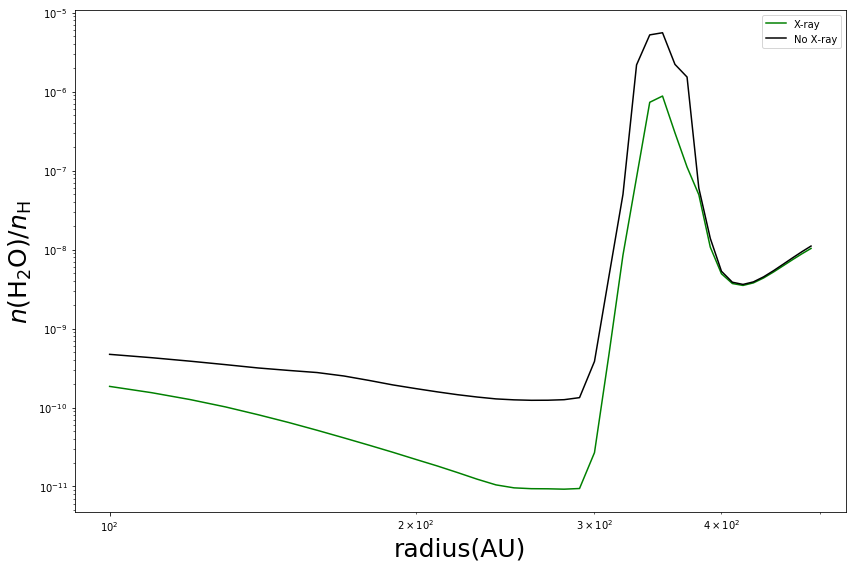

In [18]:
radius_list = np.arange(100,500,10)
plot_disk('H2O', radius_list)

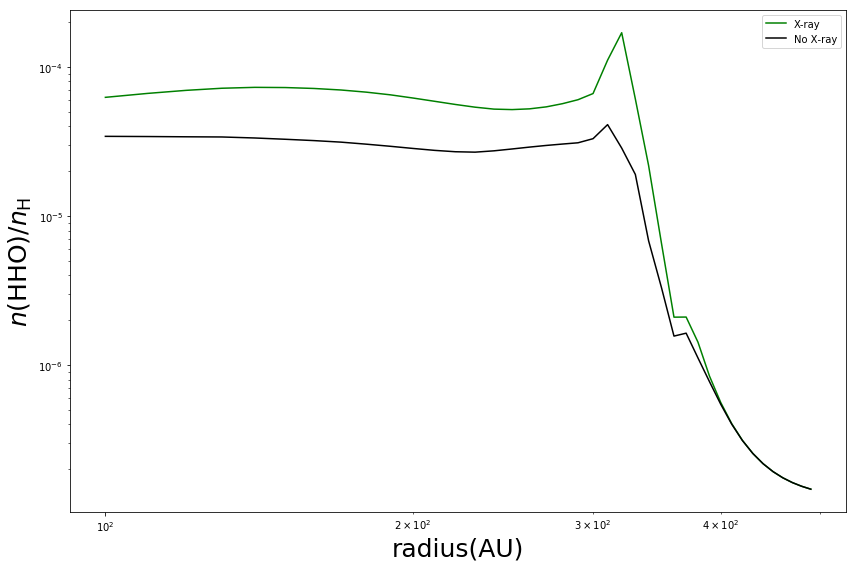

In [17]:
radius_list = np.arange(100,500,10)
plot_disk('H_DUSTH_DUSTO_DUST', radius_list)

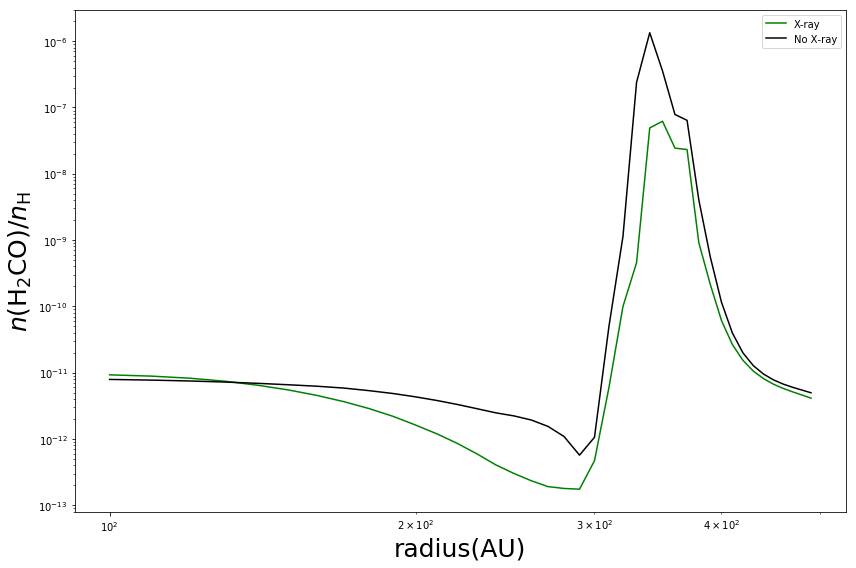

In [16]:
radius_list = np.arange(100,500,10)
plot_disk('H2CO', radius_list)

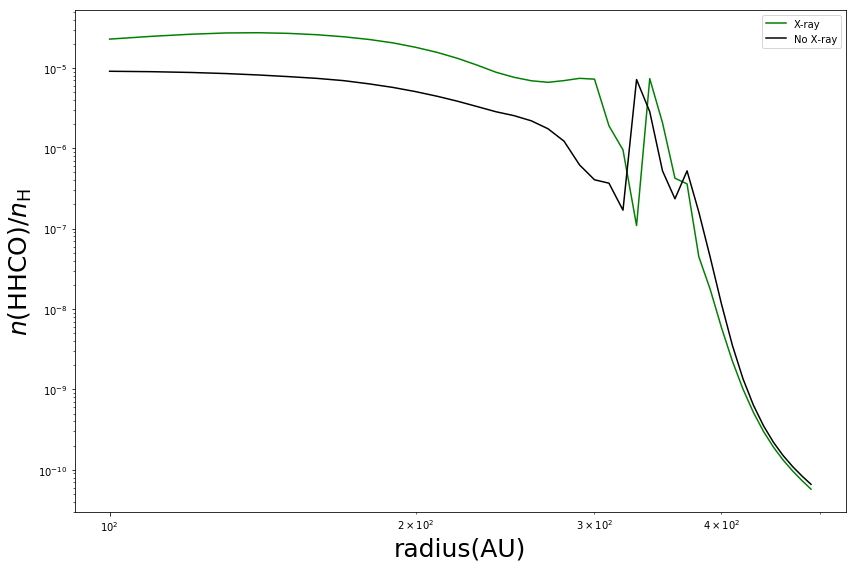

In [15]:
radius_list = np.arange(100,500,10)
plot_disk('H_DUSTH_DUSTC_DUSTO_DUST', radius_list)

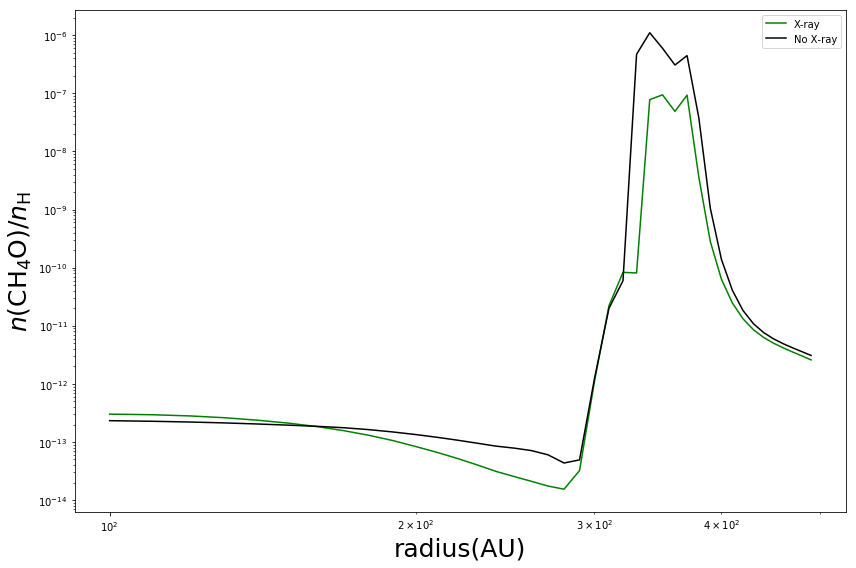

In [14]:
radius_list = np.arange(100,500,10)
plot_disk('CH4O', radius_list)

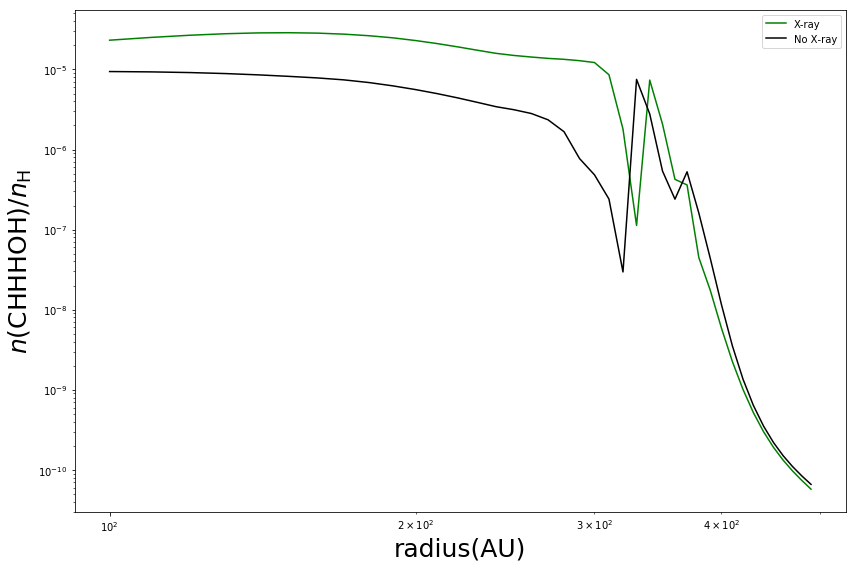

In [11]:
radius_list = np.arange(100,500,10)
plot_disk('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', radius_list)

245


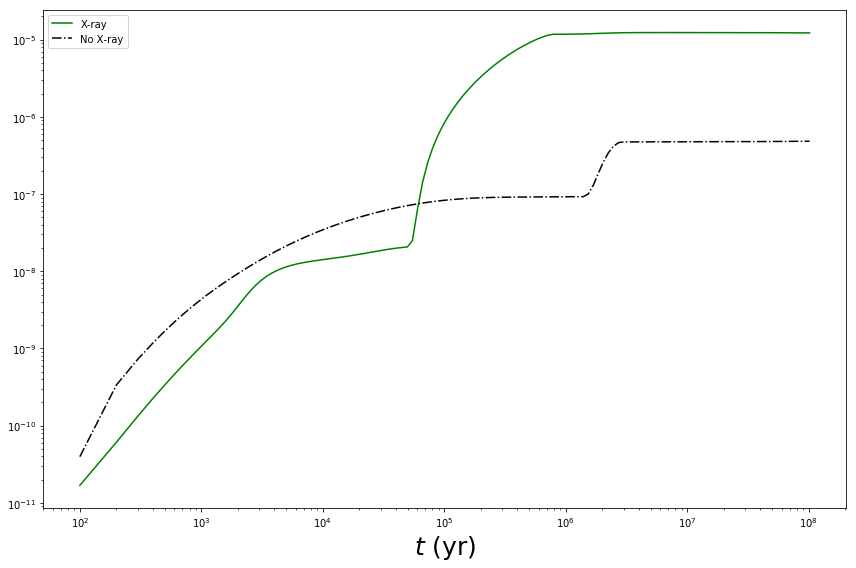

In [13]:
plot_default('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 300)

### old result
consider the line cross the center of disk, some mistaking adding molecular gas effect

245


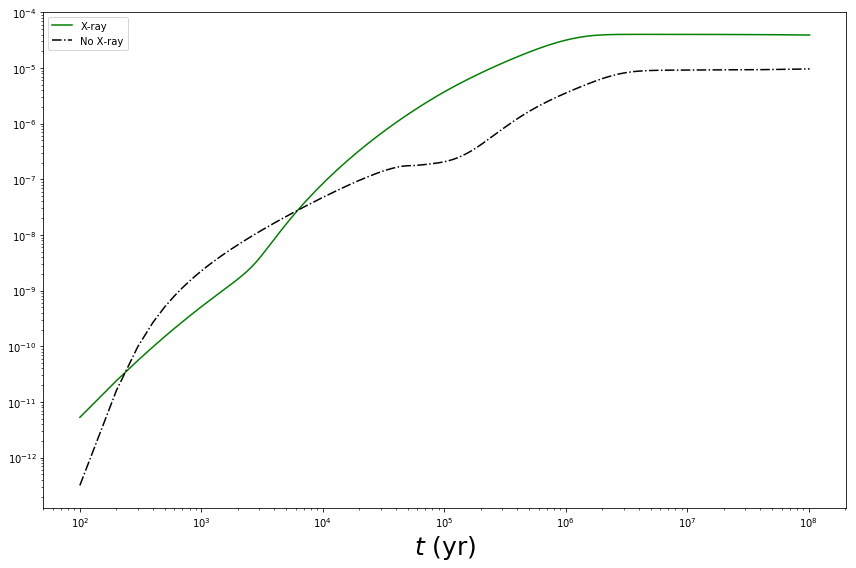

In [86]:
plot_test('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 680)

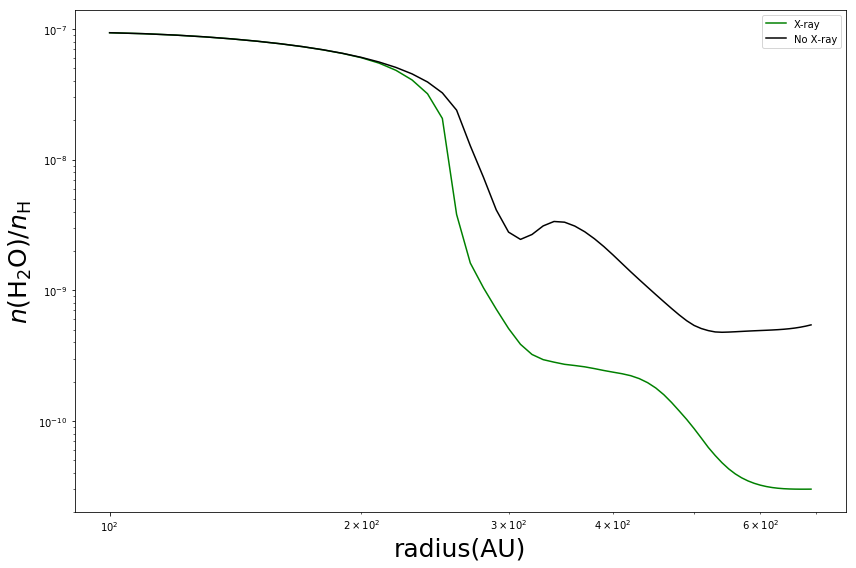

In [73]:
radius_list = np.arange(100,700,10)
plot_disktest('H2O', radius_list)

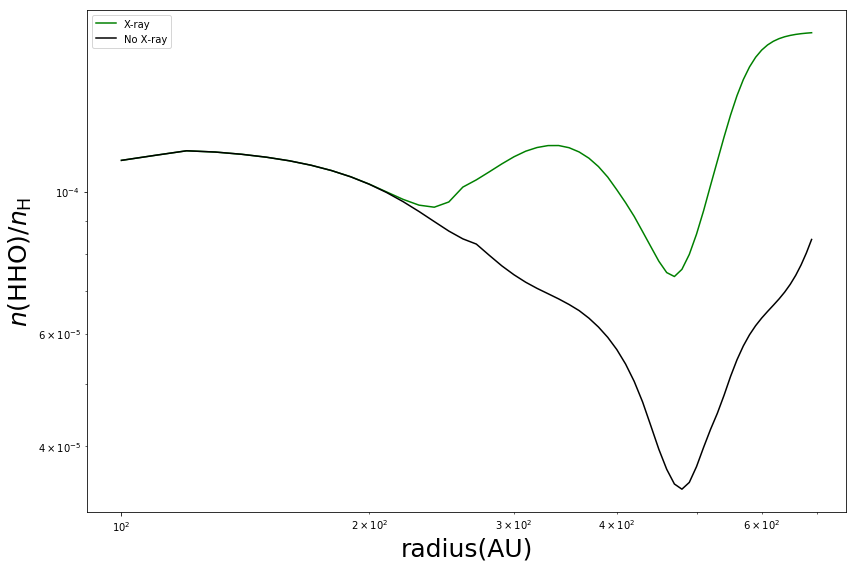

In [72]:
radius_list = np.arange(100,700,10)
plot_disktest('H_DUSTH_DUSTO_DUST', radius_list)

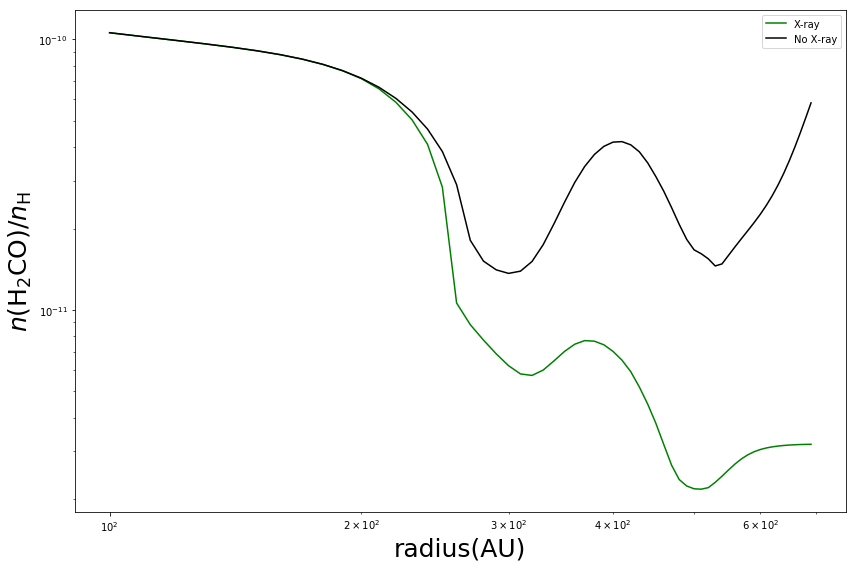

In [71]:
radius_list = np.arange(100,700,10)
plot_disktest('H2CO', radius_list)

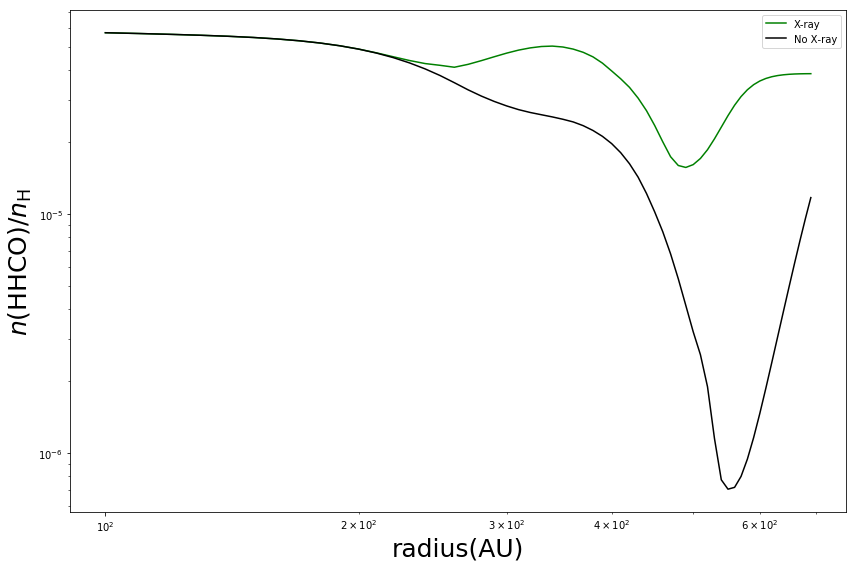

In [70]:
radius_list = np.arange(100,700,10)
plot_disktest('H_DUSTH_DUSTC_DUSTO_DUST', radius_list)

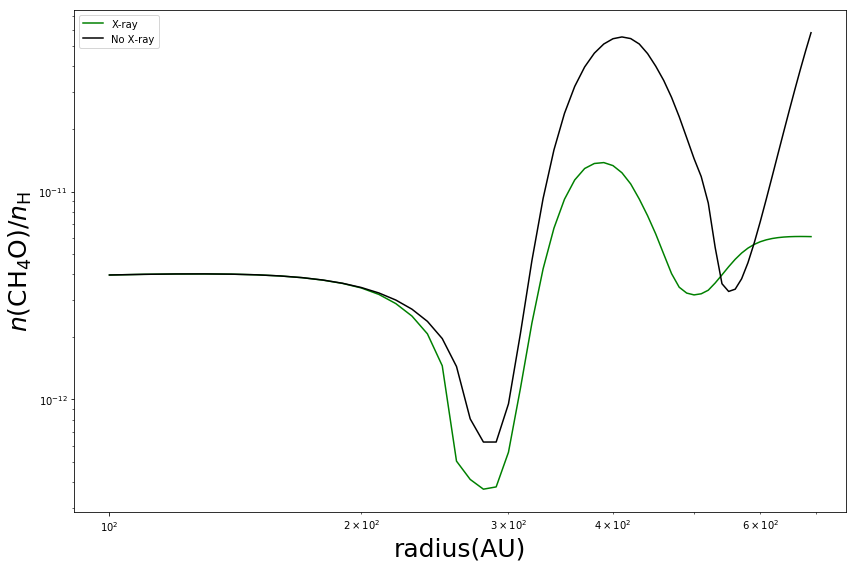

In [69]:
radius_list = np.arange(100,700,10)
plot_disktest('CH4O', radius_list)

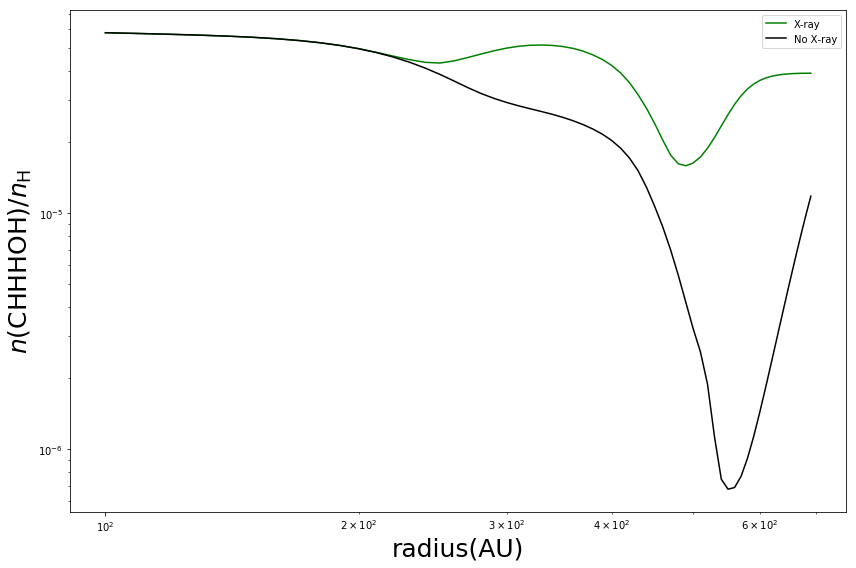

In [68]:
radius_list = np.arange(100,700,10)
plot_disktest('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', radius_list)

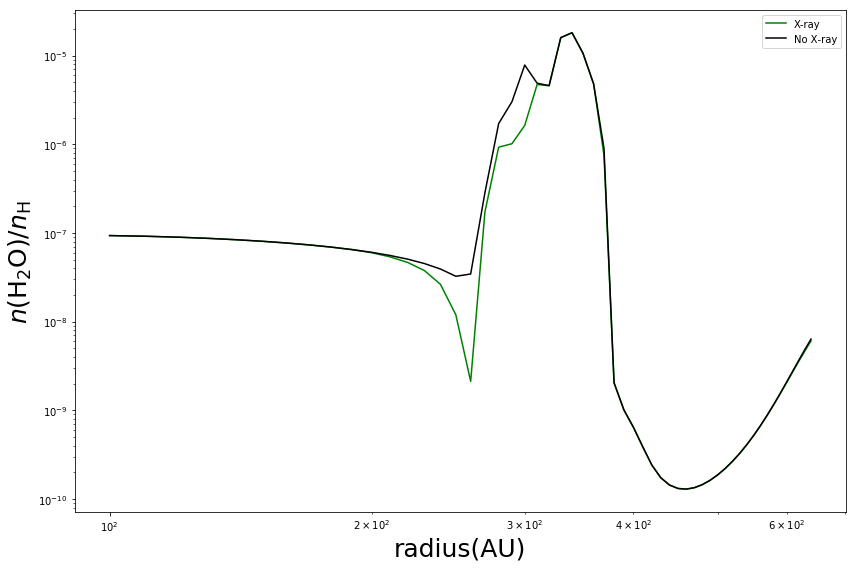

In [44]:
radius_list = np.arange(100,650,10)
plot_disk('H2O', radius_list)

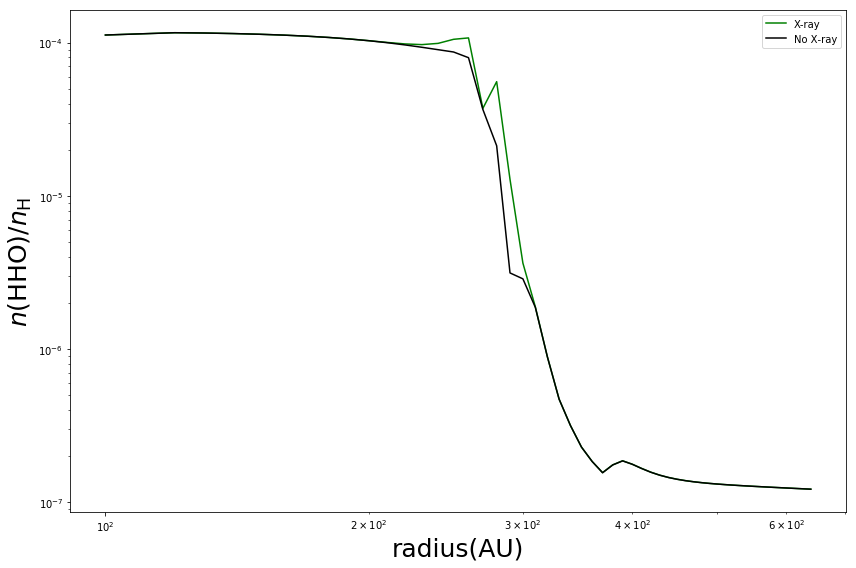

In [45]:
radius_list = np.arange(100,650,10)
plot_disk('H_DUSTH_DUSTO_DUST', radius_list)

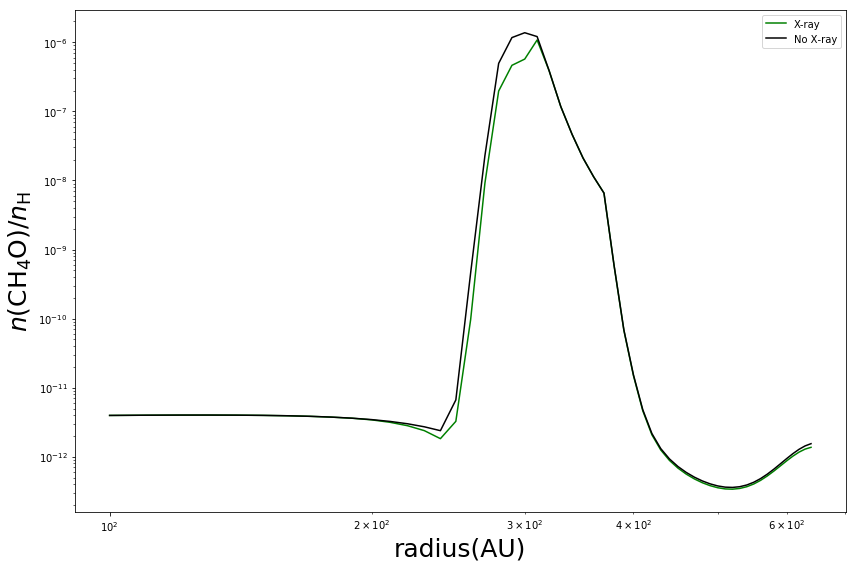

In [46]:
radius_list = np.arange(100,650,10)
plot_disk('CH4O', radius_list)

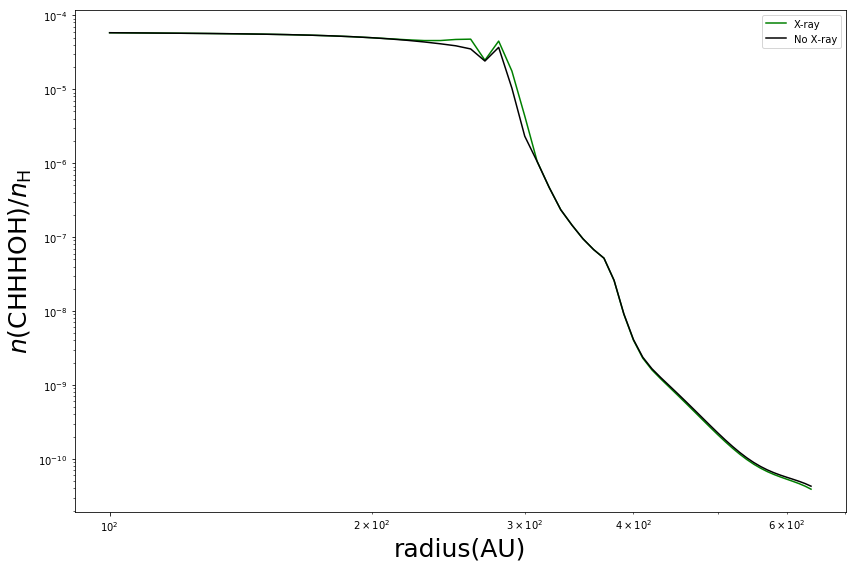

In [47]:
radius_list = np.arange(100,650,10)
plot_disk('C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', radius_list)

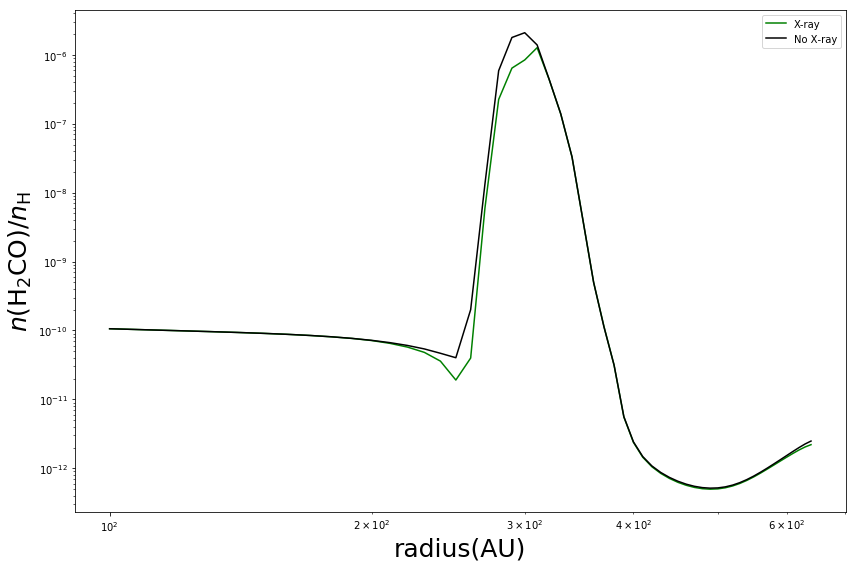

In [48]:
radius_list = np.arange(100,650,10)
plot_disk('H2CO', radius_list)

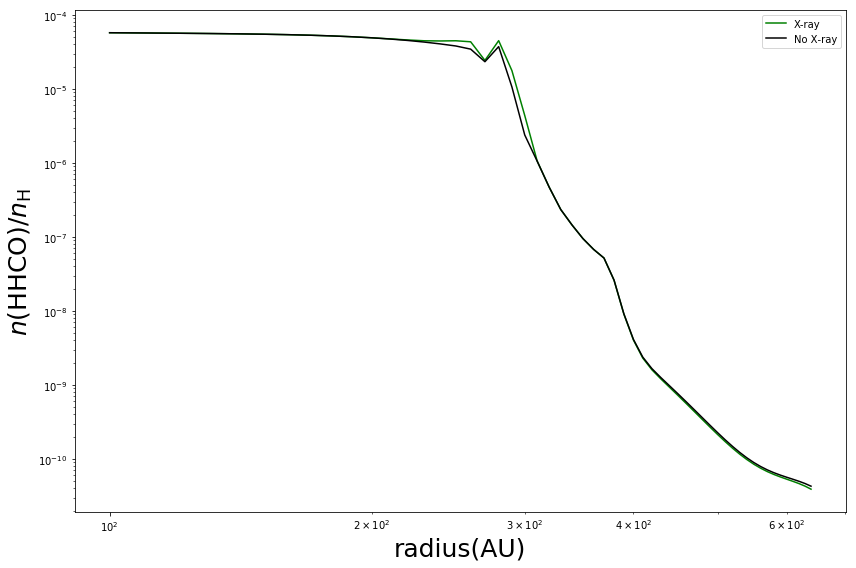

In [49]:
radius_list = np.arange(100,650,10)
plot_disk('H_DUSTH_DUSTC_DUSTO_DUST', radius_list)

234


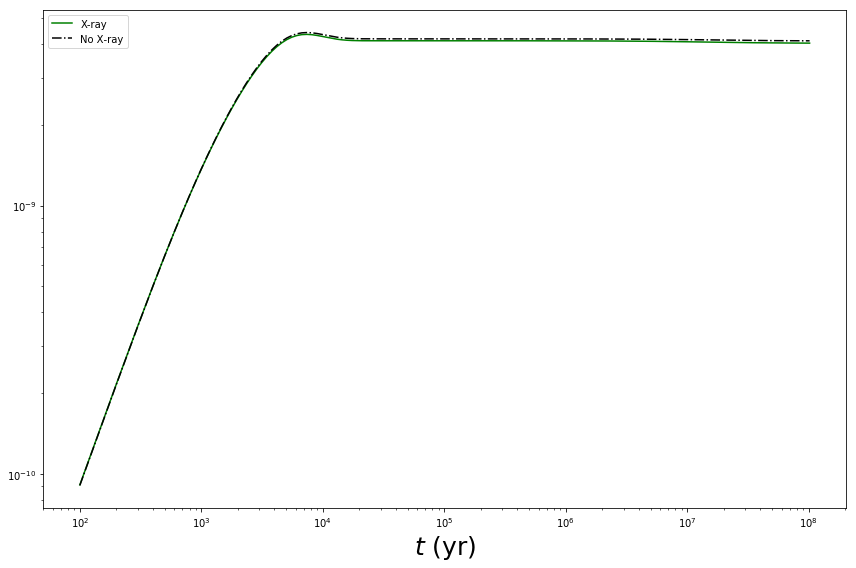

In [76]:
plot_default('H_DUSTH_DUSTC_DUSTO_DUST', 400)

21


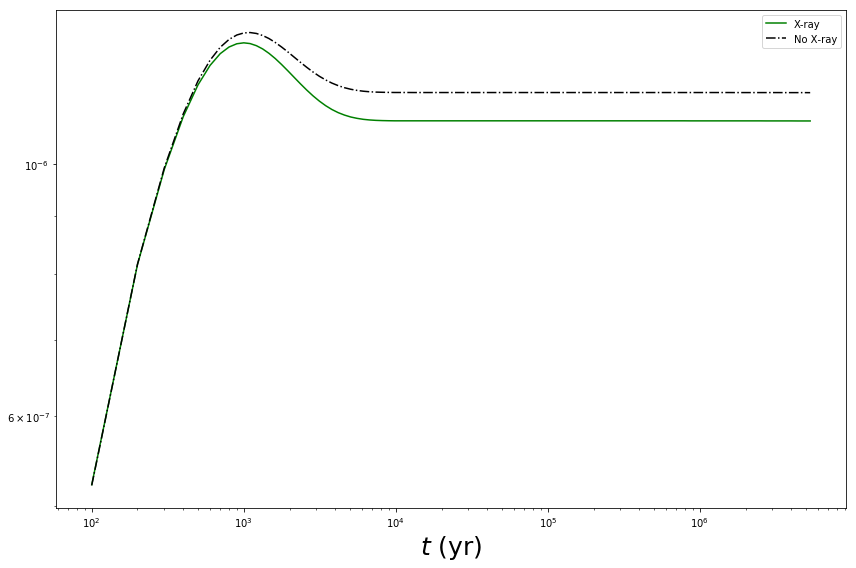

In [91]:
plot_default('CO', 500)

218


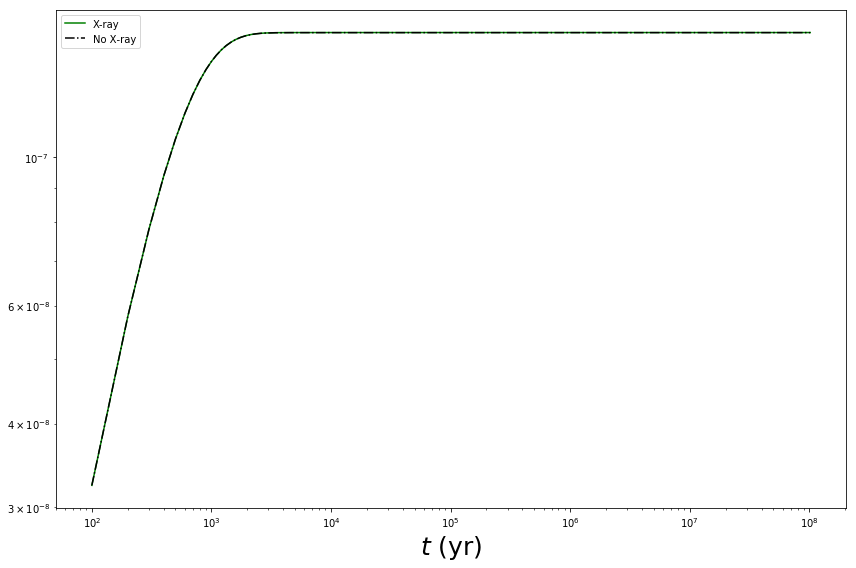

In [121]:
plot_default('H_DUSTH_DUSTO_DUST', 290)

21


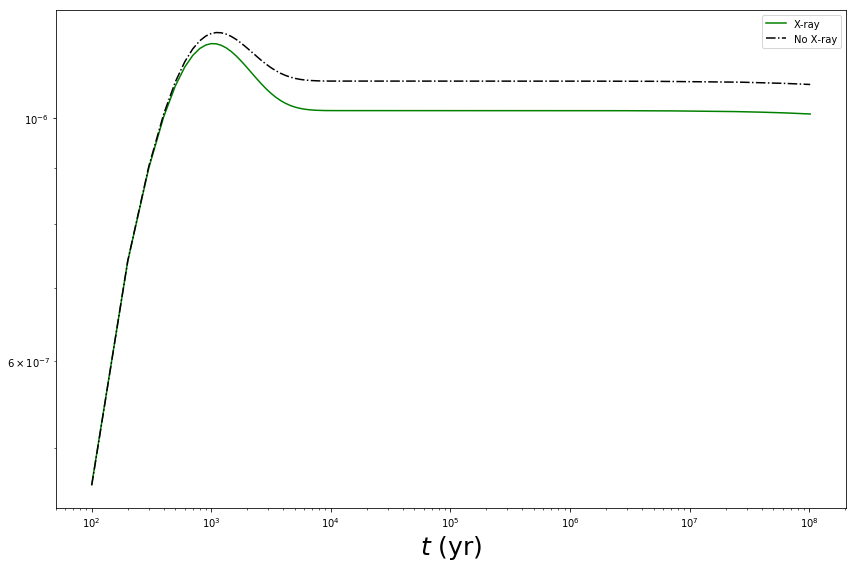

In [122]:
plot_default('CO', 290)

21


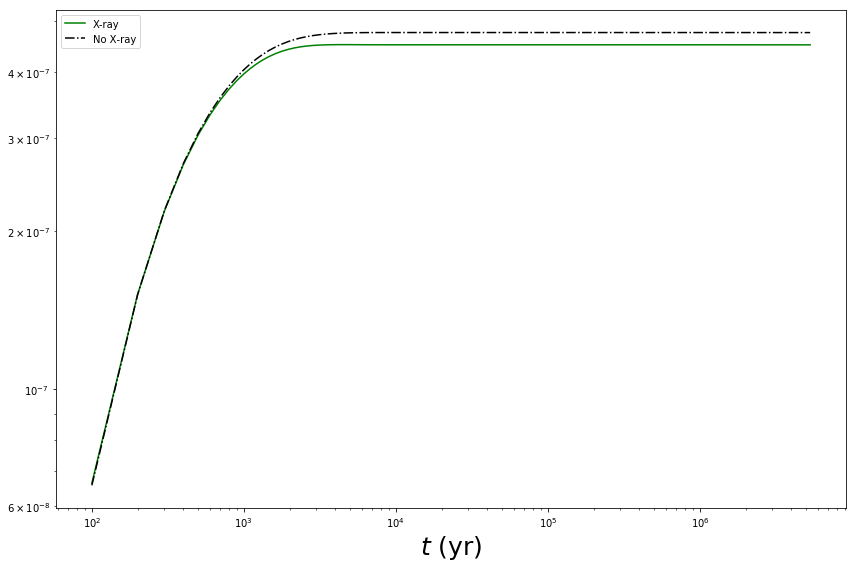

In [90]:
plot_default('CO', 550)

218


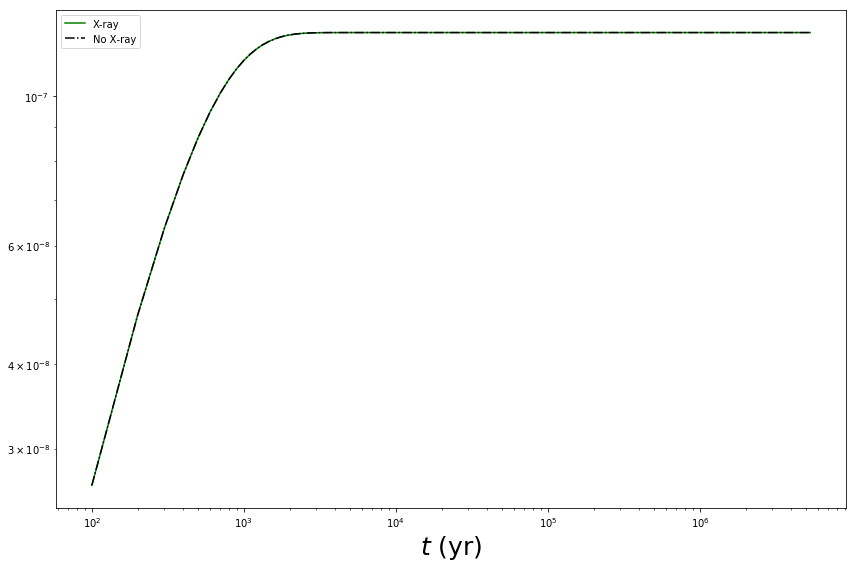

In [89]:
plot_default('H_DUSTH_DUSTO_DUST', 600)

21


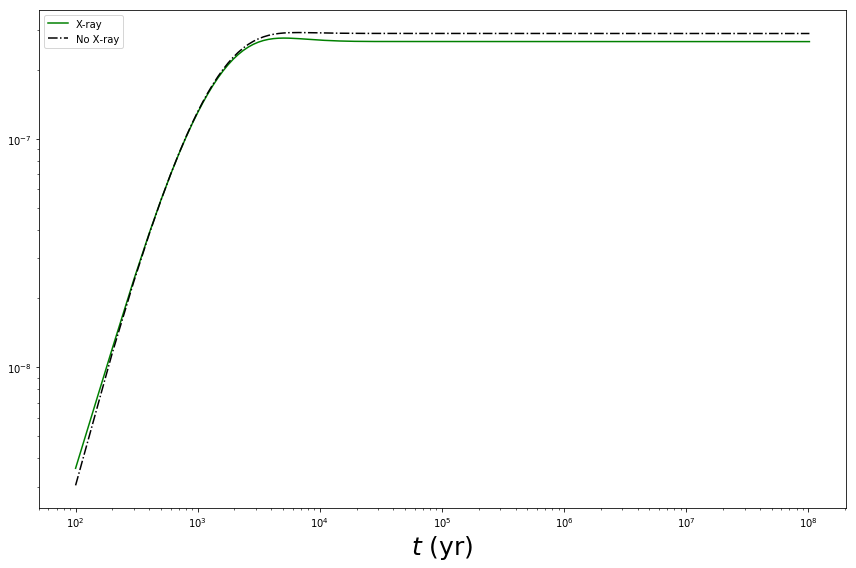

In [123]:
plot_default('CO', 450)